1 - Análise exploratória de dados

In [47]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
# Carregamento de dados
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [49]:
#listando colunas
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [50]:
# Observando número de linhas e colunas
dados.shape

(267542, 11)

In [51]:
#imprimindo as primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [52]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [53]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [54]:
# Tratativa dos dados faltantes, que consiste em substituir pela string "Nada Consta"
# dados.fillna('Nada Consta', inplace=True)

# Tratativa optada foi remover as linhas que estavam com NA
dados.dropna(inplace=True)

In [55]:
# Observando de novo número de linhas e colunas
dados.shape

(202297, 11)

In [56]:
# Verificando se tratativa funcionou
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [57]:
# Verificando se há dados duplicados
dados.duplicated().sum() 

2

In [58]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)

In [59]:
# Verificando se duplicados foram removidos
dados.duplicated().sum() 

0

In [60]:
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [61]:
# Criando categorias para separar colunas numéricas e categóricas
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [62]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [63]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


In [64]:
# Contagem de valores por modelo
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [65]:
# Contagem de valores por modelo
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [66]:
# BREVE EXPLICAÇÃO DOS RESULTADOS DA ANALISE EXPLORATORIA

# blablabla

 Visualização dos dados

In [67]:
# Contagem de quantidade de carros por marca
valores_contados_1 = dados['brand'].value_counts()
print(valores_contados_1)

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64


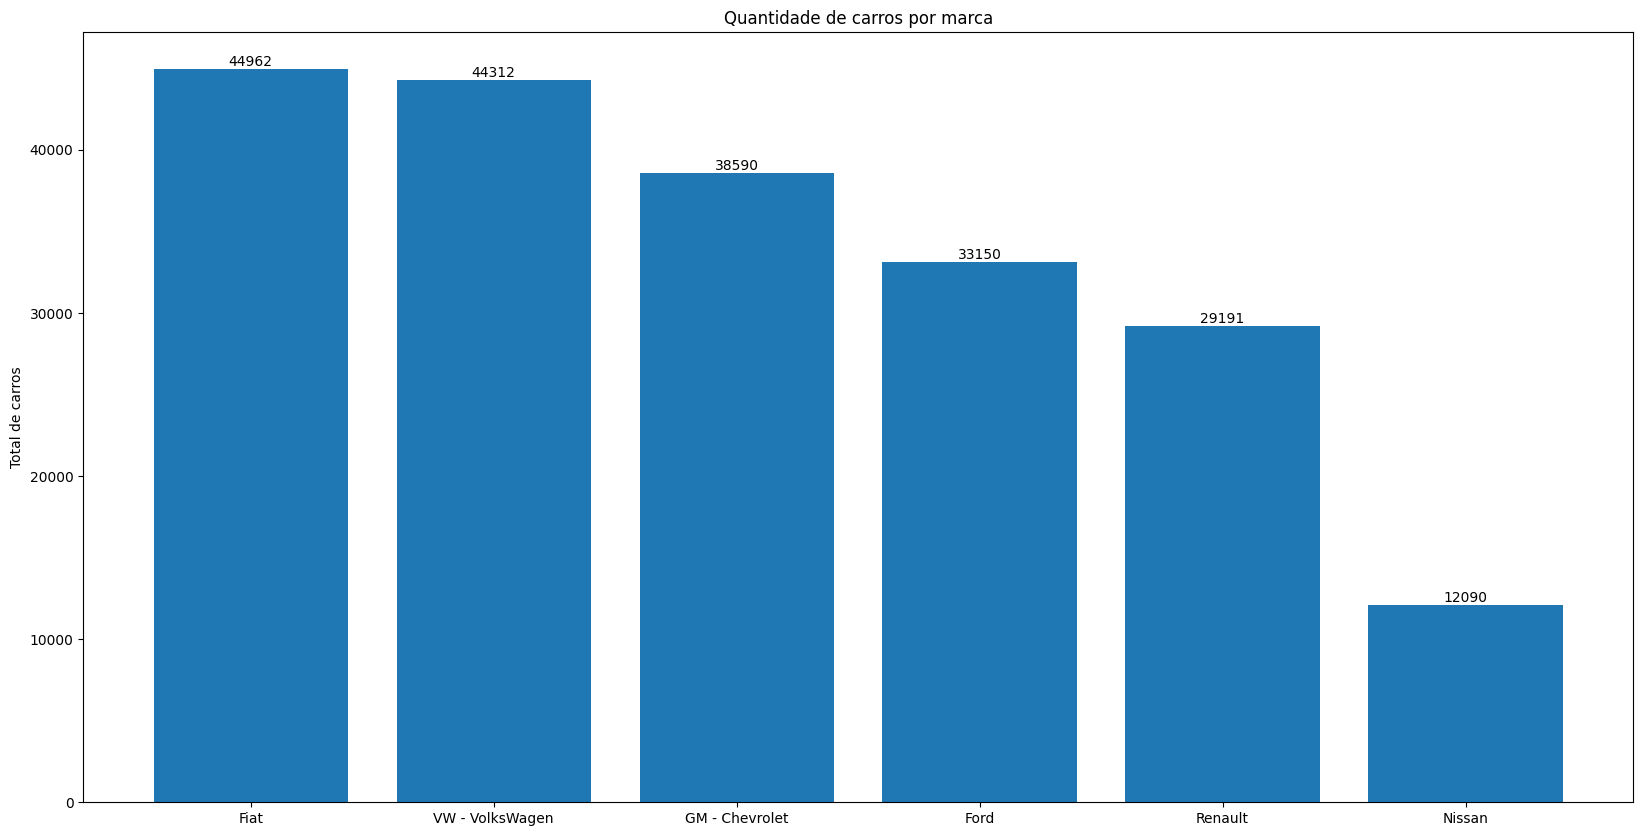

In [68]:
# Gráfico da quantidade de carros por marca
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(valores_contados_1.index, valores_contados_1.values) 
plt.title('Quantidade de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10);

In [69]:
# Contagem de quantidade de carros por tipo de engrenagem
valores_contados_2 = dados['gear'].value_counts()
print(valores_contados_2)

gear
manual       161883
automatic     40412
Name: count, dtype: int64


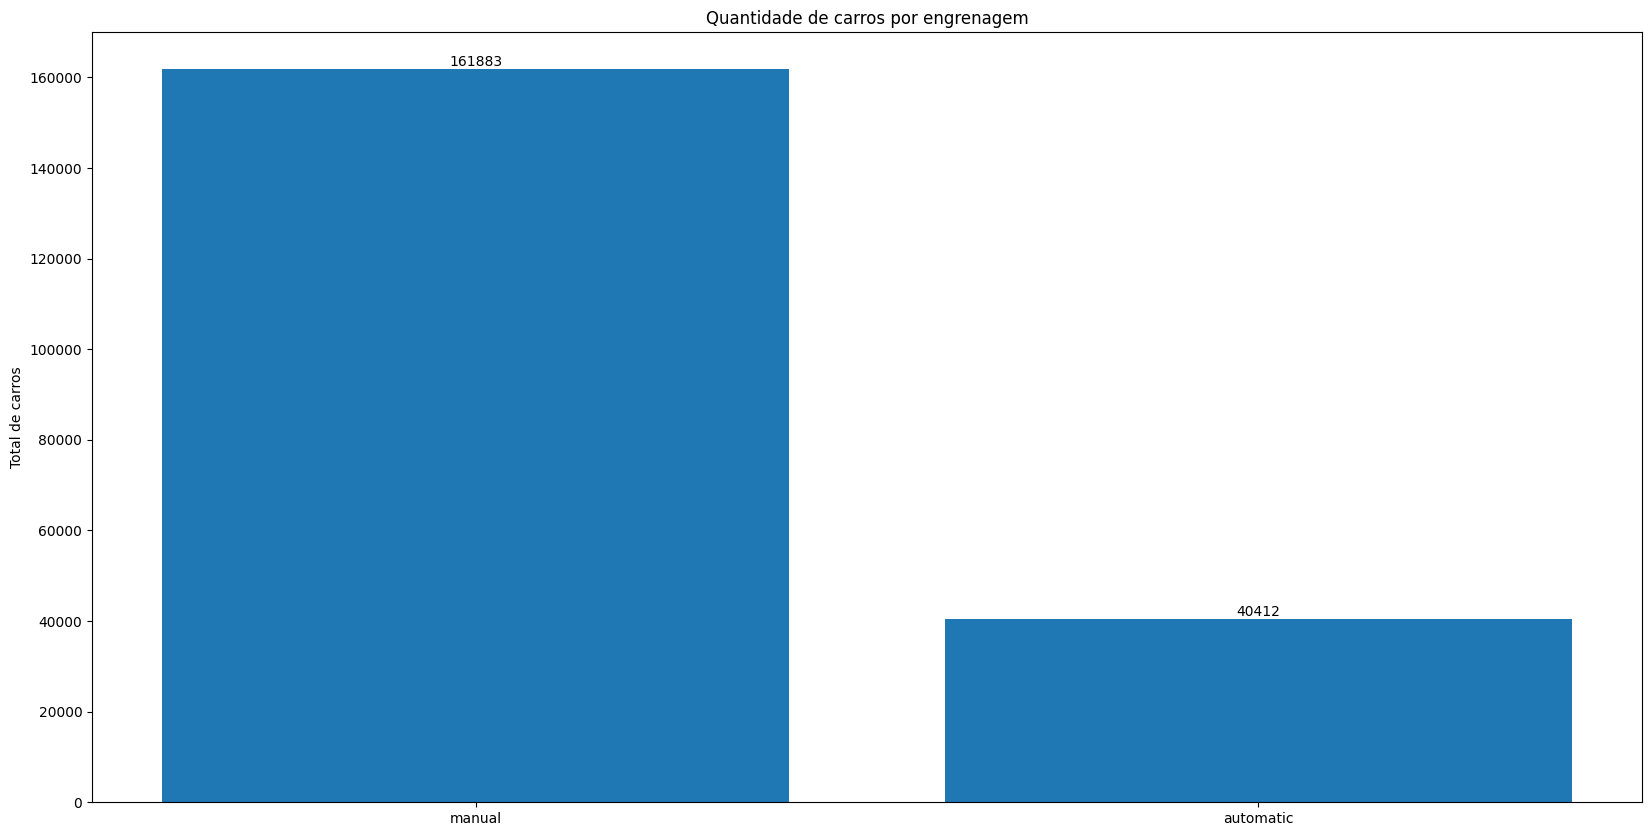

In [70]:
# Gráfico da quantidade de carros por tipo de engrenagem
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_2 = plt.bar(valores_contados_2.index, valores_contados_2.values) 
plt.title('Quantidade de carros por engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_2, size=10);

In [71]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [72]:
# Calculando a média de preço de carro por mês ao longo de 2022 ???????????????????????????????? VER COMO A ANA FEZ, O CODIGO DELA FUNCIONOU, DO DANIEL TAMBEM!
media_preco_carros = dados.groupby(['year_of_reference','month_of_reference'])['avg_price_brl'].mean().round(0)
media_preco_carros.head(30)

year_of_reference  month_of_reference
2021.0             April                 44451.0
                   August                49363.0
                   December              53674.0
                   February              42411.0
                   January               42160.0
                   July                  48163.0
                   June                  46882.0
                   March                 43147.0
                   May                   45074.0
                   November              52689.0
                   October               51532.0
                   September             50554.0
2022.0             April                 57150.0
                   August                57924.0
                   December              57997.0
                   February              55825.0
                   January               54840.0
                   July                  57894.0
                   June                  58066.0
                   March       

In [73]:
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='avg_price_brl', hue='avg_price_brl', data=media_preco_carros, hue_order=['2022.0'])
plt.xticks(rotation=45);

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 2000x1000 with 0 Axes>

In [83]:
# Calculando a distribuição da média de preço dos carros por marca e tipo de engrenagem
media_preco_carros_2 = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round(0)
media_preco_carros_2.head(40)

brand            gear     
Fiat             automatic    97397.0
                 manual       39694.0
Ford             automatic    84769.0
                 manual       51784.0
GM - Chevrolet   automatic    88157.0
                 manual       52119.0
Nissan           automatic    94231.0
                 manual       52681.0
Renault          automatic    44028.0
                 manual       47649.0
VW - VolksWagen  automatic    99735.0
                 manual       40390.0
Name: avg_price_brl, dtype: float64

In [84]:
# Reset index
media_preco_carros_2 = media_preco_carros_2.reset_index(name='Valor médio')
media_preco_carros_2.head()

,brand,gear,Valor médio
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


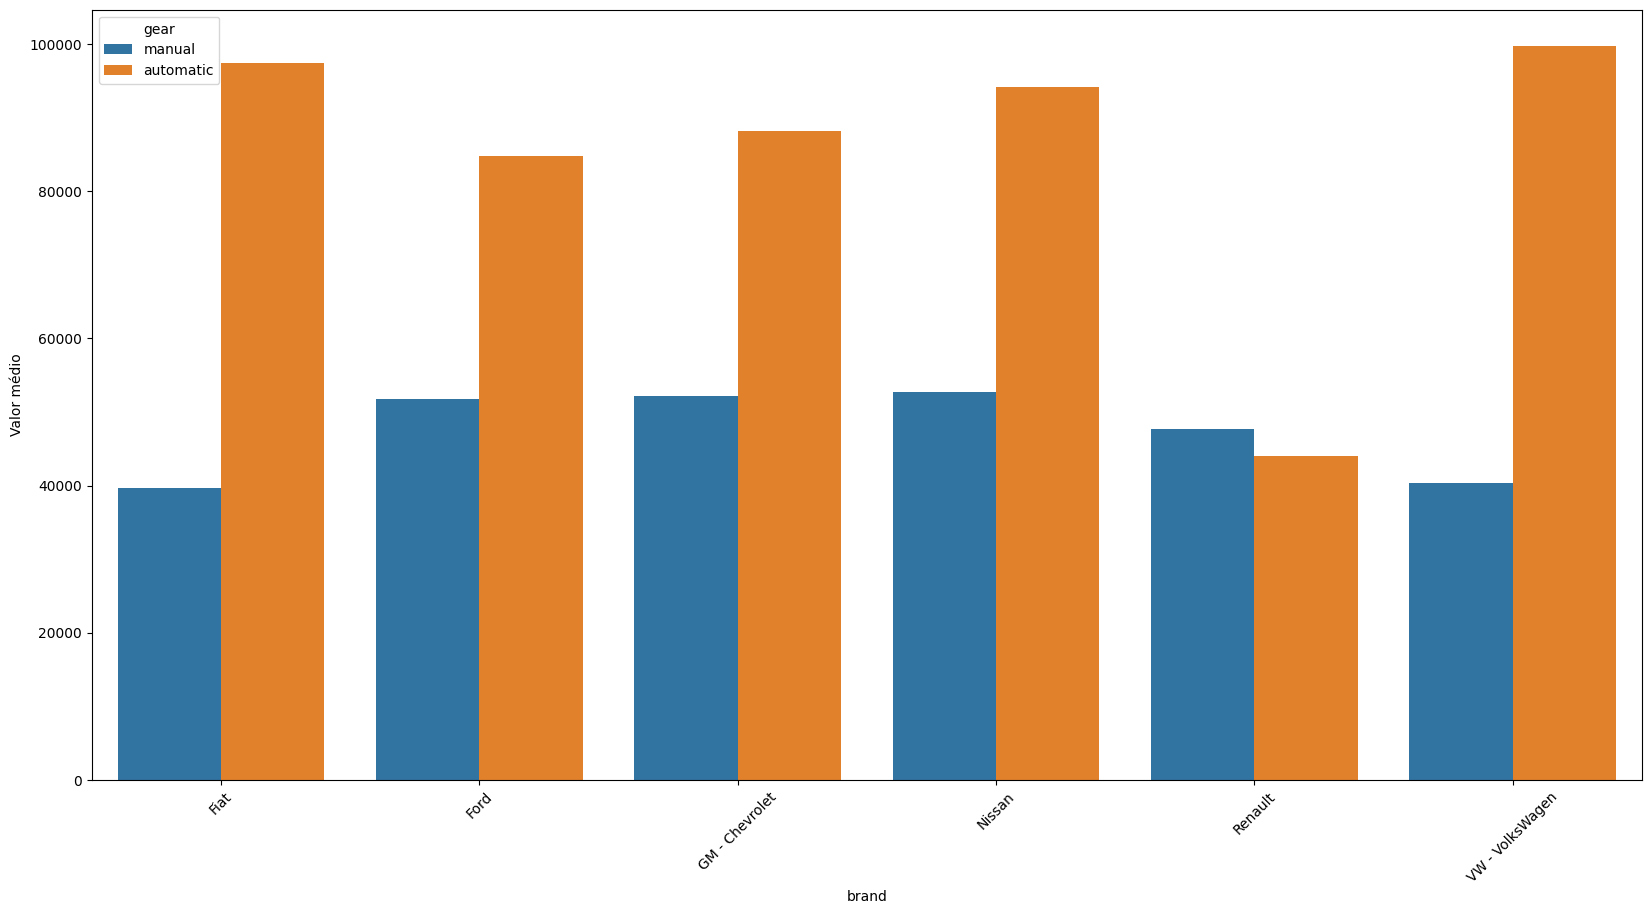

In [85]:
# Plotando a forma visual
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Valor médio', hue='gear', data=media_preco_carros_2, hue_order=['manual', 'automatic'])
plt.xticks(rotation=45);